***DIGIT RECOGNIZER WITH CNN***

In [1]:
#Gerekli kütüphaneleri yükleme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Verileri yükleme
train_data = pd.read_csv('/kaggle/input/digit-recognizer-data/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer-data/digit-recognizer/test.csv')

In [3]:
#Veriseti içerisinde eksik veri olup olmadığını kontrol ettim.

missing_data = train_data.isnull().sum()  # Her sütundaki eksik veri sayısını hesapla
missing_data = missing_data[missing_data > 0]  # Sadece eksik veri içeren sütunları filtrele

if not missing_data.empty:
    print("Eksik veri var - eksik değer sayıları:")
    print(missing_data)
else:
    print("Train verisetinde eksik veri yok.")


missing_data = test_data.isnull().sum()  # Her sütundaki eksik veri sayısını hesapla
missing_data = missing_data[missing_data > 0]  # Sadece eksik veri içeren sütunları filtrele

if not missing_data.empty:
    print("Eksik veri var - eksik değer sayıları:")
    print(missing_data)
else:
    print("Test verisetinde eksik veri yok.")

Train verisetinde eksik veri yok.
Test verisetinde eksik veri yok.


In [4]:
#Train verisinde etiket sütununu ayırarak farklı bir değişkene kaydederiz
X_train = train_data.drop(columns=['label']).values
y_train = train_data['label'].values

# Test verisinde etiket sütunu olmadığı için yukarıdaki işlem burada uygulanmaz
X_test = test_data.values

print(f"Eğitim Verisi: {X_train.shape}, Etiket: {y_train.shape}")
print(f"Test Verisi: {X_test.shape}")


Eğitim Verisi: (42000, 784), Etiket: (42000,)
Test Verisi: (28000, 784)


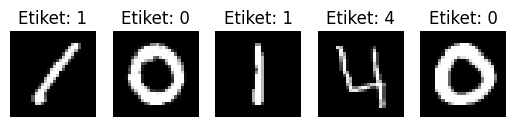

In [5]:
#Verilerin ilk beş tanesini görselleştirip verileri inceledim. (matplotlib kütüphanesini kullandım)
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Etiket: {y_train[i]}")
    plt.axis('off')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

# Normalizasyon yapalım, piksellerin hepsini 0-1 arasında yeniden ölçeklendiririz. Daha tutarlı ve performansı yüksek sonuçlar alabilmemiz için kullanılır. 
X_train = X_train / 255.0
X_test = X_test / 255.0

# Verileri modelin kullanabileceği şekilde yeniden boyutlandırdım
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Train verisetini train ve validation olarak (0.2 oranında) ikiye ayırdım
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Eğitim Verisi: {X_train.shape}, Doğrulama Verisi: {X_val.shape}")


Eğitim Verisi: (33600, 28, 28, 1), Doğrulama Verisi: (8400, 28, 28, 1)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN Modelini oluşturduk
model = Sequential()

#1. Konvolüsyon Katmanı
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2))) #boyut küçültme

#2. Konvolüsyon Katmanı
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))  #boyut küçültme

#3. Konvolüsyon Katmanı
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))  #boyut küçültme

#Flatten Katmanı: çıktıyı düzleştirir
model.add(Flatten())
model.add(Dropout(0.5)) #Overfitting sorunuyla karşılaşmamak için Dropout ekledim. Sonuç üzerinde olumlu bir etkisi oldu.

#Fully Connected Katman: Çıkış Katmanı
model.add(Dense(10, activation='softmax'))
#Çoklu sınıflandırma problemi olduğu için softmax kullandım

#Modeli  derleme
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#Çıktıda çoklu sınıflandırma problemi olduğu için loss fonksiyonu olarak sparse_categorical_crossentropy kullandım.

#Model katmanlarının özeti ve parametre sayılarını gösterir
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,962 (367.04 KB)

 Trainable params: 93,962 (367.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callback: her epoch için belirli bri accuracy, loss değerine ulaşıldığında modeli durdurur. En optimize sonuçlara ulaşmmıza yardımcı bir fonksiyondur. 
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(factor=0.5, patience=3) #ReduceLROnPlateau: 3 epoch boyunca velidation loss değeri iyileşmezse learning rate 0.5 oranında azaltır

In [9]:
# Modeli eğitme
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20, 
    batch_size=64, 
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20


I0000 00:00:1732649684.213606     917 service.cc:145] XLA service 0x7f470c0062f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732649684.213649     917 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732649684.213653     917 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 70/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3491 - loss: 1.9099

I0000 00:00:1732649686.818107     917 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7167 - loss: 0.8761 - val_accuracy: 0.9598 - val_loss: 0.1351 - learning_rate: 0.0010
Epoch 2/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9442 - loss: 0.1855 - val_accuracy: 0.9736 - val_loss: 0.0884 - learning_rate: 0.0010
Epoch 3/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9603 - loss: 0.1333 - val_accuracy: 0.9745 - val_loss: 0.0809 - learning_rate: 0.0010
Epoch 4/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9689 - loss: 0.1070 - val_accuracy: 0.9819 - val_loss: 0.0583 - learning_rate: 0.0010
Epoch 5/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9727 - loss: 0.0905 - val_accuracy: 0.9800 - val_loss: 0.0644 - learning_rate: 0.0010
Epoch 6/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9769 - loss: 0.0770 - val_accuracy: 0.9824 - val_loss: 0.0585 - learning_rate: 0.0010
Epoch 7/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9791 - loss: 0.0721 - val_accurac

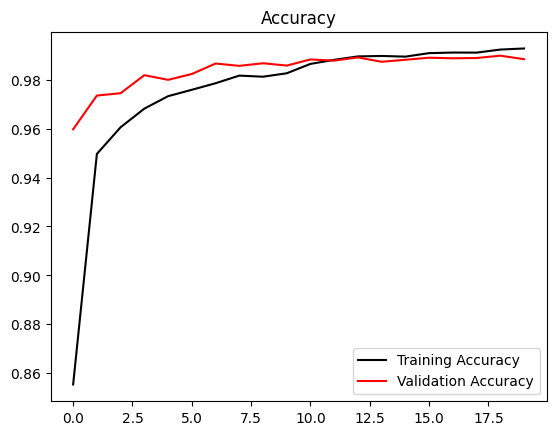

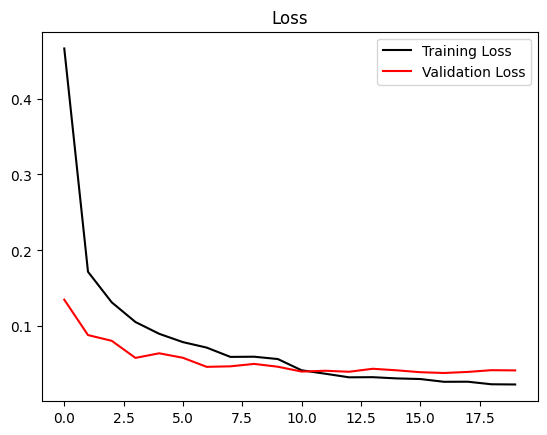

In [10]:
# Eğitim ve doğrulama performansının grafik gösterimi

# Eğitim ve doğrulama doğruluğu
plt.plot(history.history['accuracy'], color = 'black', label='Training Accuracy')
plt.plot(history.history['val_accuracy'],color ='red', label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Eğitim ve doğrulama kaybı
plt.plot(history.history['loss'], color = 'black', label='Training Loss')
plt.plot(history.history['val_loss'], color ='red', label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [11]:
# Modeli kullanarak tahmin yap
predictions = model.predict(X_test)

# Tahmin edilen sınıf etiketlerini çıkar
predicted_labels = predictions.argmax(axis=1)

# İlk birkaç tahmini görüntüle
print(predicted_labels[:5])

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
[2 0 9 9 3]


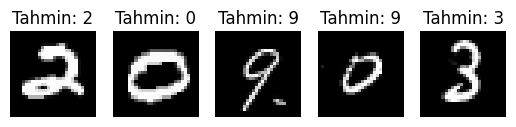

In [12]:
#Test verisetinden ilk 10 görseli inceledim, doğruluklarını değerlendirdim. 
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Tahmin: {predicted_labels[i]}")
    plt.axis('off')
plt.show()

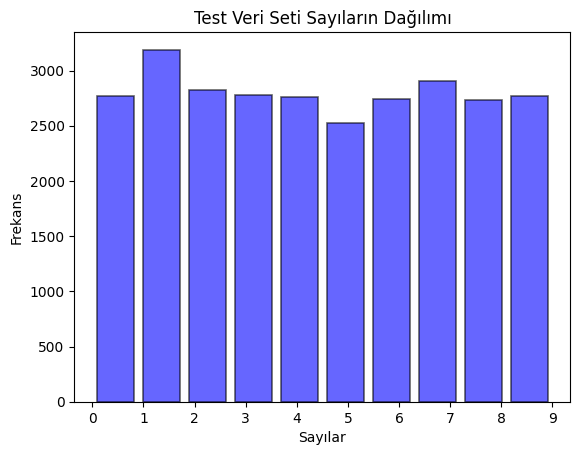

In [17]:
# Histogramı çizdir
plt.hist(predicted_labels, bins=10, color='blue', alpha=0.6, edgecolor='black', linewidth=1.2, rwidth=0.8)
plt.title('Test Veri Seti Sayıların Dağılımı')
plt.xlabel('Sayılar')
plt.ylabel('Frekans')
plt.xticks(range(10))  # 0'dan 9'a kadar birer birer göster
plt.show()


In [20]:
#Test verisetinin çıktılarını test_label.csv'ye kaydettim
# kaggle'de verilen sample_submission.csv'yi oku
submission = pd.read_csv("/kaggle/input/digit-recognizer-data/digit-recognizer/sample_submission.csv")

# Tahmin edilen etiketleri Label sütununa ekle
submission['Label'] = predictions.argmax(axis=1)

# Dosyayı test_label.csv olarak kaydet
submission.to_csv("test_label.csv", index=False)

print("Tahminler test_label.csv dosyasına kaydedildi.")

Tahminler test_label.csv dosyasına kaydedildi.


In [21]:
#Çıktıların CSV dosyasına kaydedildiğini kontrol amaçlı ilk 5 veriyi görüntüledim. 
output = pd.read_csv("test_label.csv")
print(output.head())


   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3
